In [28]:
import numpy as np
alpha = 0.064293
k = 2 # 1 < k < 15
rng = np.random.default_rng()
def compute_number_of_infected(alpha, k, rng=rng, x0=1):
    infected = np.zeros(k).astype(bool)
    sampled = np.zeros(k).astype(bool)
    infected[:x0] = 1
    while np.any(infected & ~sampled):
        arr = infected & ~sampled
        infecting_id = arr.nonzero()[0][0]
        sampled[infecting_id] = True
        probs = np.ones(k)
        probs[infecting_id] = 0
        probs /= (k - 1)
        infections = rng.binomial(k - 1, alpha)
        choices = rng.choice(k, infections, replace=False, p=probs)
        infected[choices] = True
    return sum(infected) - 1

In [38]:
iterations=20000
from collections import defaultdict
expected = defaultdict(list)
variances = defaultdict(list)
print(f'(iterations={iterations})')
#print(f'k\talpha\texp. inf.\tvar. inf.\tp0\tp1\tp2\tp3\tp4\tp5\tp6\tp7\tp8\tp9\tp10\tp11\tp12\tp13\tp14')
print(f'k\talpha\texp. inf.\tp0\tp1\tp2\tp3\tp4\tp5\tp6\tp7\tp8\tp9\tp10\tp11\tp12\tp13\tp14')
for k in np.arange(2, 15):
        #for alpha in np.arange(0.1, 1.0, 0.1):
        expected_infected = 0
        var_infected = 0
        inf_table = defaultdict(int)
        for iters in np.arange(iterations):
            
            rng = np.random.default_rng()
            infected = compute_number_of_infected(alpha, k, rng=rng)
            inf_table[infected]+=1
            x_new = infected
            mean = expected_infected
            expected_infected = (expected_infected * iters + infected) / (iters + 1)
            new_mean = expected_infected
            #if iters == 0:
            #    var_infected = x_new ** 2 
            #else:
            #    var_infected = (iters - 1) / iters * var_infected**2 + (x_new - mean)**2/(iters+1)
        
        for i_ in np.arange(0, k):
            inf_table[i_] /= iterations
            inf_table[i_] = f'{inf_table[i_]:.4f}'
        expected[alpha].append(expected_infected)
        #variances[alpha].append(var_infected)
        print(f'{k}\t{alpha:.3f}\t{expected_infected:.4f}\t{var_infected:.4f}\t'+ '\t'.join(list(inf_table.values())))
        

(iterations=20000)
k	alpha	exp. inf.	p0	p1	p2	p3	p4	p5	p6	p7	p8	p9	p10	p11	p12	p13	p14
2	0.064	0.0657	0.0000	0.9343	0.0657
3	0.064	0.1344	0.0000	0.8783	0.1090	0.0127
4	0.064	0.2203	0.0000	0.8167	0.1497	0.0302	0.0034
5	0.064	0.3091	0.0000	0.7668	0.1731	0.0119	0.0464	0.0019
6	0.064	0.4171	0.0000	0.7131	0.1911	0.0230	0.0673	0.0047	0.0007
7	0.064	0.5197	0.0000	0.6771	0.0808	0.1945	0.0132	0.0309	0.0032	0.0004
8	0.064	0.6703	0.0000	0.2037	0.0897	0.6270	0.0459	0.0090	0.0219	0.0026	0.0002
9	0.064	0.8003	0.0000	0.0945	0.5949	0.2024	0.0297	0.0153	0.0561	0.0048	0.0021	0.0003
10	0.064	0.9952	0.0000	0.1032	0.5527	0.1979	0.0229	0.0640	0.0398	0.0017	0.0126	0.0046	0.0003
11	0.064	1.2118	0.0000	0.5054	0.1080	0.2013	0.0199	0.0728	0.0461	0.0301	0.0104	0.0042	0.0016	0.0001
12	0.064	1.4369	0.0000	0.4839	0.1061	0.0277	0.0731	0.0379	0.1875	0.0167	0.0505	0.0095	0.0021	0.0046	0.0004
13	0.064	1.7468	0.0000	0.4421	0.0747	0.1825	0.0176	0.0260	0.1076	0.0561	0.0437	0.0324	0.0058	0.0094	0.0018	0.0003
14	0.064	2.0433

In [39]:
iterations=20000
from collections import defaultdict
expected = defaultdict(list)
variances = defaultdict(list)
alpha = 0.071997
print(f'(iterations={iterations})')
#print(f'k\talpha\texp. inf.\tvar. inf.\tp0\tp1\tp2\tp3\tp4\tp5\tp6\tp7\tp8\tp9\tp10\tp11\tp12\tp13\tp14')
print(f'k\talpha\texp. inf.\tp0\tp1\tp2\tp3\tp4\tp5\tp6\tp7\tp8\tp9\tp10\tp11\tp12\tp13\tp14')
for k in np.arange(2, 15):
        #for alpha in np.arange(0.1, 1.0, 0.1):
        expected_infected = 0
        var_infected = 0
        inf_table = defaultdict(int)
        for iters in np.arange(iterations):
            
            rng = np.random.default_rng()
            infected = compute_number_of_infected(alpha, k, rng=rng)
            inf_table[infected]+=1
            x_new = infected
            mean = expected_infected
            expected_infected = (expected_infected * iters + infected) / (iters + 1)
            new_mean = expected_infected
            #if iters == 0:
            #    var_infected = x_new ** 2 
            #else:
            #    var_infected = (iters - 1) / iters * var_infected**2 + (x_new - mean)**2/(iters+1)
        
        for i_ in np.arange(0, k):
            inf_table[i_] /= iterations
            inf_table[i_] = f'{inf_table[i_]:.4f}'
        expected[alpha].append(expected_infected)
        #variances[alpha].append(var_infected)
        print(f'{k}\t{alpha:.3f}\t{expected_infected:.4f}\t{var_infected:.4f}\t'+ '\t'.join(list(inf_table.values())))
        

(iterations=20000)
k	alpha	exp. inf.	p0	p1	p2	p3	p4	p5	p6	p7	p8	p9	p10	p11	p12	p13	p14
2	0.072	0.0732	0.0000	0.9268	0.0732
3	0.072	0.1501	0.0000	0.1183	0.8658	0.0159
4	0.072	0.2469	0.0000	0.8005	0.1577	0.0360	0.0057
5	0.072	0.3581	0.0000	0.7387	0.0571	0.1857	0.0026	0.0159
6	0.072	0.4901	0.0000	0.2019	0.0282	0.6804	0.0781	0.0095	0.0019
7	0.072	0.6186	0.0000	0.0894	0.6389	0.2034	0.0439	0.0181	0.0054	0.0009
8	0.072	0.7752	0.0000	0.1037	0.5917	0.0545	0.2066	0.0042	0.0261	0.0124	0.0008
9	0.072	0.9810	0.0000	0.5481	0.0657	0.2005	0.1080	0.0230	0.0104	0.0402	0.0036	0.0006
10	0.072	1.2002	0.0000	0.5097	0.1978	0.1111	0.0335	0.0471	0.0193	0.0670	0.0098	0.0039	0.0009
11	0.072	1.4590	0.0000	0.4787	0.1079	0.1816	0.0757	0.0568	0.0401	0.0171	0.0278	0.0097	0.0009	0.0037
12	0.072	1.7185	0.0000	0.0768	0.4459	0.1748	0.0261	0.0466	0.0592	0.1089	0.0340	0.0083	0.0152	0.0034	0.0008
13	0.072	2.0941	0.0000	0.4063	0.1679	0.0642	0.0757	0.1044	0.0502	0.0254	0.0413	0.0348	0.0086	0.0158	0.0046	0.0009
14	0.072	2.4741

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


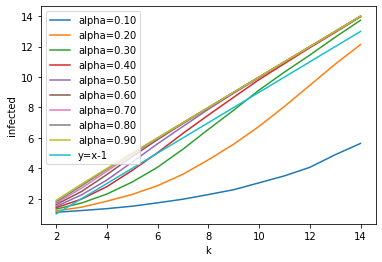

In [27]:
from matplotlib import pyplot as plt
for key in expected.keys():
    if len(expected[key]) == 0:
        continue
    print(key)
    plt.plot(np.arange(2, 15), np.array(expected[key]), label=f'alpha={key:.2f}')
    
plt.plot(np.arange(2, 15), np.arange(1, 14), label='y=x-1')
plt.legend()
plt.xlabel('k')
plt.ylabel('infected')
plt.savefig('comparison_alpha_k.png', dpi=200)